## КМ-4
Написать класс для моделирования случайных блужданий частиц. Конструктору класса
передается число частиц, так же осуществляет их случайное размещение. Необходимо
создать следующие методы: графического представления частиц, шага случайного
блуждания (на каждом шаге частицы получают случайные приращения координат,
распределенные по нормальному закону с параметрами (0, sigma)). Написать также метод,
осуществляющий моделирование q шагов случайных блужданий. 

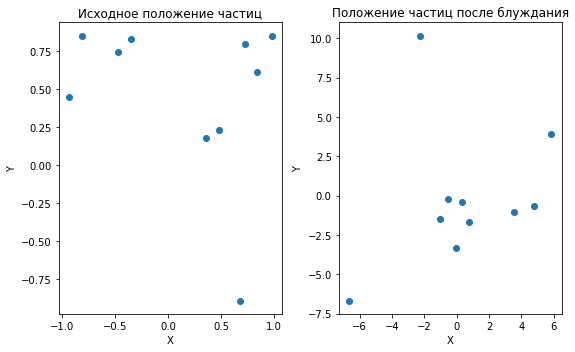

In [8]:
import random
import matplotlib.pyplot as plt


class Particle:
    def __init__(self, x1=-1, x2=1, y1=-1, y2=1):#x, y- координаты прямоугольника в котором блуждает частица
        self.random_start(x1, x2, y1, y2)

    def step(self, sigma):
        self.x += random.gauss(0, sigma)
        self.y += random.gauss(0, sigma)

    def random_start(self, x1, x2, y1, y2): 
        xs = random.uniform(x1, x2)
        ys = random.uniform(y1, y2)
        self.x = xs
        self.y = ys

    def __getitem__(self, index):
        return (self.x, self.y)[index]

    def __str__(self):
        return f'({self.x}, {self.y})'

    def __repr__(self):
        return self.__str__()        


class Walking:
    def __init__(self, count):
        self.count = count
        self.L = [Particle() for _ in range(count)]
        self.L_start = [(p[0], p[1]) for p in self.L]
        
    def walking(self, q, sigma=0.5):
        for _ in range(q):
            for p in self.L:
                p.step(sigma)

    def view(self): # Отображает частицы до и после блуждания
        fig = plt.figure(figsize=(8, 5))
        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(1, 2, 2)
        for ax in (ax1, ax2):
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
        ax1.set(title='Исходное положение частиц')
        ax2.set(title='Положение частиц после блуждания')
        ax1.scatter([p[0] for p in self.L_start], [p[1] for p in self.L_start])
        ax2.scatter([p[0] for p in self.L], [p[1] for p in self.L])
        plt.tight_layout()
        plt.show()

    def __str__(self):
        return str(self.L)

    def __repr__(self):
        return self.__str__()


walk = Walking(10)
walk.walking(100)
walk.view()
